In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold

In [2]:
print(os.listdir("../input/ou-ineritialgaitdata/OU-IneritialGaitData"))
path_name = '../input/ou-ineritialgaitdata/OU-IneritialGaitData/'

['Protocols', 'AutomaticExtractionData_IMUZCenter', 'ManualExtractionData']


In [3]:
def file_name(file_dir): 
    dic={}
    for root, dirs, files in os.walk(file_dir):
        dic[root]=files
#         print(root) #path
#         print(dirs) #subdirectory
#         print(files) #files in non-subdirectory
    return dic

In [4]:
AutomaticExtractionData=file_name("../input/ou-ineritialgaitdata/OU-IneritialGaitData/AutomaticExtractionData_IMUZCenter")
ManualExtractionData=file_name("../input/ou-ineritialgaitdata/OU-IneritialGaitData/ManualExtractionData")
ManualExtractionData_name= list(ManualExtractionData.keys())[1:]
SimilarAction = file_name("../input/ou-ineritialgaitactiondataset/OU-IneritialGaitActionDataset")
SimilarAction_name = list(SimilarAction.keys())[1:4]
label=pd.read_csv('../input/IDGenderAgelist_ig.csv',dtype='object')

In [5]:
def change_ID_number(x):
    if len(x)==3:
        return ('000' + x)
    elif len(x)==4:
        return ('00' + x)
    elif len(x)==5:
        return ('0' + x)
    else:
        return x
      
label['adjusted_ID']=label['ID'].apply(lambda x: change_ID_number(x))
def file_name_with_ID(x,post,ls):
    for i in range(len(list(ls))):
        if (x == ls[i][5:11] and ls[i][12:]== post):
            return(ls[i])

In [6]:
label['AutomaticExtractionData_IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq0.csv',list(AutomaticExtractionData.values())[0]))
label['AutomaticExtractionData_IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Center_seq1.csv',list(AutomaticExtractionData.values())[0]))
label['ManualExtractionData/IMUZCenter_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZCenter_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[0]]))
label['ManualExtractionData/IMUZRight_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZRight_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[1]]))
label['ManualExtractionData/IMUZLeft_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/IMUZLeft_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[2]]))
label['ManualExtractionData/Android_Walk_1']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk1.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_Walk_2']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'Walk2.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionData/Android_SlopeDown']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeDown.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['ManualExtractionDataAndroid_SlopeUp']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'SlopeUp.csv',ManualExtractionData[ManualExtractionData_name[3]]))
label['SimilarActionLeftSensor']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'actLabel',SimilarAction[SimilarAction_name[0]]))
label['SimilarActionRightSensor']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'actLabel',SimilarAction[SimilarAction_name[0]]))
label['SimilarActionCenterSensor']=label['adjusted_ID'].apply(lambda x: 
                                file_name_with_ID(x,'actLabel',SimilarAction[SimilarAction_name[0]]))

In [7]:
path_name_act = "../input/ou-ineritialgaitactiondataset/OU-IneritialGaitActionDataset/"

In [8]:
def generate_read_table(path,fileName,actionName,ID,label): 
  #try:
    dataset_name= fileName + actionName
    path_name= fileName +'/'+ str(label[label['ID']==ID][dataset_name].values[0])
    if fileName=='ManualExtractionData/Android':
      df=pd.read_csv(path + path_name,skiprows=2)
      df.columns=[0,0,0,df.columns.values[3],df.columns.values[4],df.columns.values[5]]
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    elif fileName == "SimilarAction":
      df=pd.read_table(path + actionName + "/" + str(label[label['ID']==ID][dataset_name].values[0]) ,skiprows=1)
      return df
      df.columns=[0,0,0,df.columns.values[3],df.columns.values[4],df.columns.values[5]]
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    else:
      df=pd.read_csv(path + path_name,skiprows=2)
      insert_line=pd.DataFrame(df.columns.values).T
      df.columns=insert_line.columns
      df=pd.concat([insert_line,df],axis=0)
    df.columns=['Gx','Gy','Gz','Ax','Ay','Az']
    df = df.astype(float)
    return df
  #except:
    #return None
df = generate_read_table(path_name, 'AutomaticExtractionData_IMUZCenter','_Walk_1','002318',label)

In [9]:
df.head()

,Gx,Gy,Gz,Ax,Ay,Az
0,0.236353,-0.627744,0.041949,-0.024,-0.826,0.150
0,0.177763,-0.622424,-0.053925,0.006,-0.834,0.148
1,0.044605,-0.638404,-0.181756,0.028,-0.824,0.148
2,-0.045942,-0.670364,-0.309588,0.040,-0.822,0.084
3,-0.056595,-0.643724,-0.384157,0.060,-0.844,0.026


In [10]:
df = generate_read_table(path_name_act, 'SimilarAction','LeftSensor','000104',label)

In [11]:
df[:5].head()

,Gx,Gy,Gz,Ax,Ay,Az,Label
0,-0.024172,-0.454651,0.173332,0.052,-0.770,-0.138,0
1,-0.018845,-0.433345,0.168006,0.072,-0.766,-0.142,0
2,0.018439,-0.428019,0.157353,0.110,-0.758,-0.138,0
3,0.002460,-0.348124,0.104090,0.130,-0.760,-0.134,0
4,0.055723,-0.273556,0.072132,0.150,-0.780,-0.122,0


In [12]:
#df["Label"].plot()
#df[df["Label"] == 4].plot()

In [13]:
import random
import math

def yipeng_preprocessing(raw_data, length):
            
  # Data augmentation
  if raw_data.shape[0] > length:
    #data = raw_data[0:length] # Cut the data
    start_index = random.randrange(len(raw_data) - (length))
    data = raw_data[start_index: start_index + length]
  else:
    period = math.ceil(length / raw_data.shape[0])
    temp = np.copy(raw_data)
    # copy the data periodic
    for i in range(period-1):
      temp = np.row_stack((temp, raw_data))
      data = (temp[0:length]) # Cut the data
            
  return data

In [14]:
import copy

df = pd.read_csv('../input/IDGenderAgelist_ig.csv')
ids = df["ID"].values
gender = df["Gender(0:Female;1:Male)"].values
age = copy.deepcopy(df["Age"].values)
act_age = df["Age"].values

In [15]:
from keras.utils.np_utils import to_categorical
#for i in range(0,40):
#    age[(age > (i * 2.5)) & (age <= ((i + 1) * 2.5))] = i
#for i in range(0,20):
#    age[(age > (i * 5.0)) & (age <= ((i + 1) * 5.0))] = i
for i in range(0,10):
    age[(age > (i * 10.0)) & (age <= ((i + 1) * 10.0))] = i

Using TensorFlow backend.


(array([214., 150.,  94., 117., 127.,  32.,  19.,  10.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <a list of 8 Patch objects>)

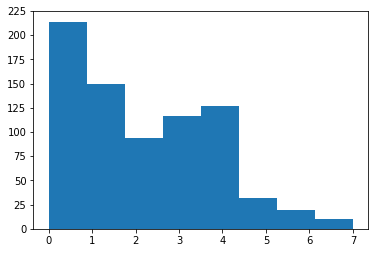

In [16]:
#plt.hist(age,bins = 32)
plt.hist(age,bins = 8)

In [17]:
to_categorical(age).shape

(763, 8)

In [18]:
df.head()

,ID,Gender(0:Female;1:Male),Age
0,104,1,33
1,2318,0,11
2,2422,1,9
3,2526,0,45
4,2630,0,37


In [19]:
from keras.models import Sequential, Model
from keras.layers import Input, LSTM, Bidirectional, Dropout, Flatten, Dense, TimeDistributed, GlobalMaxPooling1D, Conv2D, Reshape, Activation, Add, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D
from keras.losses import categorical_crossentropy, binary_crossentropy, mae
from keras.layers.merge import concatenate
from keras.optimizers import SGD

#Deep Convoluional LSTM model
"""

def get_model(n_timesteps,n_features):
  inputs = Input(shape=(n_timesteps,n_features,))
  x = Conv1D(256, 8, padding='same', activation='relu')(inputs)
  x = Conv1D(256, 8, padding='same', activation='relu')(x)
  x = MaxPooling1D(2, padding='same')(x)
  x = Conv1D(128, 8, padding='same', activation='relu')(x)
  x = resblock(x,128,8)
  x = MaxPooling1D(2, padding='same')(x)
  x = Conv1D(64, 8, padding='same', activation='relu')(x)
  x = resblock(x,64,8)
  x = MaxPooling1D(2, padding='same')(x)
  x = Conv1D(16, 8, padding='same', activation='relu')(x)
  x = resblock(x,16,8)
  x = MaxPooling1D(2, padding='same')(x)
  x = Conv1D(8, 4, padding='same', activation='relu')(x)
  x = resblock(x,8,4)
  x = MaxPooling1D(2, padding='same')(x)
  x = Bidirectional(LSTM(10,return_sequences=True))(x)
  x = Bidirectional(LSTM(10))(x)
  x = Dropout(0.5)(x)
  predictions = Dense(1, activation='sigmoid')(x)
  
  model = Model(inputs=inputs, outputs = predictions)
  model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model 

def resblock(x, filters, kernel_size):
    x_ = Conv1D(filters, kernel_size, padding='same')(x)
    x_ = BatchNormalization()(x_)
    x_ = Activation(LeakyReLU())(x_)
    x_ = Conv1D(filters, kernel_size, padding='same')(x_)
    x = Add()([x_, x])
    x = BatchNormalization()(x)
    x = Activation(LeakyReLU())(x)
    return x

"""
def get_model(n_timesteps,n_features):
  inputs = Input(shape=(n_timesteps,n_features,))
  x = Conv1D(256, 11, padding='same', activation='relu')(inputs)
  x = BatchNormalization()(x)
  x = MaxPooling1D(2, padding='same')(x)
  x = Conv1D(256, 11, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPooling1D(2, padding='same')(x)
  x = Conv1D(128, 11, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv1D(64, 11, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Bidirectional(LSTM(100,return_sequences=True))(x)
  x = Bidirectional(LSTM(100))(x)
  x = Dropout(0.5)(x)
  
  x_gender = Dense(100, activation='relu')(x)
  gender = Dense(1, activation='sigmoid',name='gender')(x_gender)
  
  x_age = Dense(100, activation='relu')(x)
  age = Dense(8, activation='softmax',name='age')(x_age)
  
  #x_data = Dense(100, activation='relu')(x)
  #data = Dense(3, activation='softmax',name='dataset')(x_data)
  
    
  outputs = [gender, age]
  
  model = Model(inputs=inputs, outputs = outputs)
  sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

  model.compile(loss={'gender': binary_crossentropy, 'age': categorical_crossentropy},
                  loss_weights={'gender': 0.50, 'age': 0.50},
                optimizer= "adam", metrics=['accuracy'])
  return model 

In [20]:
def get_max(y_pred):
    for i in range(len(y_pred)):
        temp = y_pred[i]
        temp[np.argmax(temp)] = 1
        temp[temp != 1] = 0
        y_pred[i] = temp
    return y_pred

In [21]:
def oversample(x_train, gender_train, age_train, dataset_train, limit):
    age_train_index = np.argmax(age_train,axis = 1)
    ls_class_size = []
    for i in range(0,8):
        ls_class_size.append(np.sum(age_train_index == i))

    max_class_size = max(ls_class_size)
    max_index = np.argmax(ls_class_size)
    aug_x = []
    aug_age = []
    aug_gender = []
    aug_dataset = []

    for i in tqdm(range(0,8)):
        if(i == max_index):
            continue
        c = 0
        if(ls_class_size[i] == 0):
            continue
        temp = []
        temp_age = []
        temp_gender = []
        temp_dataset= []
        while((ls_class_size[i] + c) <= max_class_size):
            index = random.randrange(ls_class_size[i])
            temp.append(x_train[age_train_index == i][index])
            temp_age.append(age_train[age_train_index == i][index])
            temp_gender.append(gender_train[age_train_index == i][index])
            temp_dataset.append(dataset_train[age_train_index == i][index])
            c += 1
            if(c == limit):
                break
        aug_x.extend(np.array(temp))
        aug_age.extend(np.array(temp_age))
        aug_gender.extend(np.array(temp_gender))
        aug_dataset.extend(np.array(temp_dataset))
        del temp
        del temp_age
        del temp_gender
        del temp_dataset
        gc.collect()
    aug_x = np.array(aug_x)
    aug_age = np.array(aug_age)
    aug_gender = np.array(aug_gender)
    aug_dataset = np.array(aug_dataset)
    
    return aug_x, aug_age, aug_gender, aug_dataset

In [24]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import backend as K
from sklearn.preprocessing import StandardScaler
import gc

ls_acc = []
ls_mae = []
length = 500

datasets = label.columns[4:]
file_name=['AutomaticExtractionData_IMUZCenter','ManualExtractionData/IMUZCenter','ManualExtractionData/IMUZRight',
          'ManualExtractionData/IMUZLeft','ManualExtractionData/Android']
action_name=['_Walk_1','_Walk_2','_SlopeDown','_SlopeUp']
sensor_loc = ["CenterSensor", "RightSensor", "LeftSensor"]
skf = StratifiedKFold(n_splits = 5)

for train_index, test_index in skf.split(ids, gender):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    ids_train, ids_test = ids[train_index], ids[test_index]
    gender_train, gender_test = gender[train_index], gender[test_index]
    age_dummy = to_categorical(age)
    age_train, age_test = age_dummy[train_index], age_dummy[test_index]
    #age_train, age_test = act_age[train_index], act_age[test_index]
    _, act_age_test = act_age[train_index], act_age[test_index]
    ids_train, ids_valid, gender_train, gender_valid, age_train, age_valid  = train_test_split(ids_train, gender_train, age_train,  test_size=0.10, random_state=42)
    
    x_train = []
    new_y_train = []
    new_gender_train = []
    new_age_train = []
    sensor_train = []
    for i in tqdm(range(0,len(ids_train))):
        subject_id = change_ID_number(str(ids_train[i]))
        for k in range(0,len(file_name) - 1):
            for l in range(0,len(action_name)):
                try:
                    #for c in range(0,3):
                        df_subject = generate_read_table(path_name,file_name[k], action_name[l],subject_id,label)
                        sc = StandardScaler()
                        df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                        temp_x = yipeng_preprocessing(df_subject.values, length)
                        x_train.append(temp_x)
                        new_gender_train.append(gender_train[i])
                        new_age_train.append(age_train[i])
                        if(k == 0 or k == 1):
                            sensor_train.append(0)
                        elif(k == 2):
                            sensor_train.append(1)
                        elif(k == 3):
                            sensor_train.append(2)
                except: 
                    continue
                
        for k in range(0,3):
            try:
                df_subject = generate_read_table(path_name_act,'SimilarAction',sensor_loc[k],subject_id,label)
                del df_subject["Label"]
                sc = StandardScaler()
                df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                #temp_x = yipeng_preprocessing(df_subject.values, length)
                start_index = 0
                while(start_index + length < len(df_subject)):
                    temp_x = df_subject.values[start_index:start_index + length]
                    x_train.append(temp_x)
                    new_gender_train.append(gender_train[i])
                    new_age_train.append(age_train[i])
                    sensor_train.append(k)
                    start_index += length
            except: 
                continue
            
    x_valid = []
    new_gender_valid = []
    new_age_valid = []
    sensor_valid = []
    
    for i in tqdm(range(0,len(ids_valid))):
        subject_id = change_ID_number(str(ids_valid[i]))
        for k in range(0,3):
            try:
                df_subject = generate_read_table(path_name_act,'SimilarAction',sensor_loc[k],subject_id,label)
                del df_subject["Label"]
                sc = StandardScaler()
                df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                start_index = 0
                while(start_index + length < len(df_subject)):
                    temp_x = df_subject.values[start_index:start_index + length]
                    x_valid.append(temp_x)
                    new_gender_valid.append(gender_valid[i])
                    new_age_valid.append(age_valid[i])
                    sensor_valid.append(k)
                    start_index += length 
            except:
                continue
           
    x_test = []
    new_gender_test = []
    new_age_test= []
    new_act_age_test = []
    ls_count = []
     
    for i in tqdm(range(0,len(ids_test))):
        subject_id = change_ID_number(str(ids_test[i]))
        for k in range(0,3):
            try:
                df_subject = generate_read_table(path_name_act,'SimilarAction',sensor_loc[k],subject_id,label)
                del df_subject["Label"]
                sc = StandardScaler()
                df_subject = pd.DataFrame(sc.fit_transform(df_subject))
                start_index = 0
                c = 0
                while(start_index + length < len(df_subject)):
                    temp_x = df_subject.values[start_index:start_index + length]
                    x_test.append(temp_x)                    
                    start_index += length
                    c += 1
                ls_count.append(c)
                new_gender_test.append(gender_test[i])
                new_age_test.append(age_test[i])
                new_act_age_test.append(act_age_test[i])
            except:
                continue
            
    print("Train size: " + str(len(x_train)))
    print("Valid size: " + str(len(x_valid)))
    print("Test size: " + str(len(x_test)))
    x_train = np.array(x_train)
    x_valid = np.array(x_valid)
    x_test = np.array(x_test)
    gender_train = np.array(new_gender_train)
    gender_valid = np.array(new_gender_valid)
    gender_test = np.array(new_gender_test)
    age_train = np.array(new_age_train)
    age_valid = np.array(new_age_valid)
    age_test = np.array(new_age_test)
    act_age_test = np.array(new_act_age_test)
        
    sensor_train = to_categorical(sensor_train)
    #sensor_valid = to_categorical(sensor_valid)
        
    #del new_gender_train, new_gender_valid, new_gender_test, new_age_train, new_age_valid, new_age_test, new_act_age_test
    #gc.collect()
    
    #aug_x, aug_age, aug_gender, aug_sensor = oversample(x_train, gender_train, age_train, sensor_train, 1000)
    #x_train = np.concatenate([x_train,aug_x])
    #age_train = np.concatenate([age_train,aug_age])
    #gender_train = np.concatenate([gender_train,aug_gender])
    #sensor_train = np.concatenate([sensor_train,aug_sensor])
    
    model = get_model(x_train.shape[1],x_train.shape[2])
    #result = model.fit(x_train, [gender_train, age_train, sensor_train], validation_data = (x_valid,[gender_valid, age_valid, sensor_valid]),epochs= 15, batch_size = 256)
    result = model.fit(x_train, [gender_train, age_train], validation_data = (x_valid,[gender_valid, age_valid]),epochs= 10, batch_size = 256)   
    y_pred = model.predict(x_test)
    
    #del x_train, gender_train, age_train, sensor_train, x_valid, gender_valid, age_valid, sensor_valid
    gc.collect()
    
    gender_pred = []
    age_pred = []
    c = 0
    for i in range(len(ls_count)):
        gender_pred.append(y_pred[0][c:c + ls_count[i]].mean())
        age_pred.append(np.mean(y_pred[1][0:0 + ls_count[i]], axis = 0))
        c += ls_count[i]
    gender_pred = np.array(gender_pred)
    age_pred = np.array(age_pred)
    
    gender_pred[gender_pred < 0.5] = 0
    gender_pred[gender_pred >= 0.5] = 1
    print(accuracy_score(gender_pred,gender_test))
    ls_acc.append(accuracy_score(gender_pred,gender_test))
    
    age_pred = get_max(age_pred)
    print(accuracy_score(np.array(age_pred),age_test))
    _, age_pred_index = np.where(age_pred == 1.0)
    #mean_age = age_pred_index * 2.5 + 1.25
    #mean_age = age_pred_index * 5.0 + 2.5
    mean_age = age_pred_index * 10.0 + 5.0
    print(np.mean(abs(act_age_test - mean_age)))
    ls_mae.append(np.mean(abs(act_age_test - mean_age)))
    
    K.clear_session()

  0%|          | 1/549 [00:00<00:58,  9.42it/s]

TRAIN: 610 TEST: 153


100%|██████████| 153/153 [00:03<00:00, 50.57it/s]


Train size: 12071
Valid size: 783
Test size: 1897
Train on 12071 samples, validate on 783 samples
Epoch 1/5
12071/12071 [==============================] - 68s 6ms/step - loss: 1.2004 - gender_loss: 0.6022 - age_loss: 1.7986 - gender_acc: 0.6613 - age_acc: 0.2859 - val_loss: 1.2883 - val_gender_loss: 0.6289 - val_age_loss: 1.9476 - val_gender_acc: 0.6590 - val_age_acc: 0.2465
Epoch 2/5
12071/12071 [==============================] - 62s 5ms/step - loss: 0.9887 - gender_loss: 0.4456 - age_loss: 1.5318 - gender_acc: 0.7908 - age_acc: 0.4051 - val_loss: 1.4159 - val_gender_loss: 0.7303 - val_age_loss: 2.1015 - val_gender_acc: 0.6079 - val_age_acc: 0.2069
Epoch 3/5
12071/12071 [==============================] - 62s 5ms/step - loss: 0.8781 - gender_loss: 0.3747 - age_loss: 1.3815 - gender_acc: 0.8340 - age_acc: 0.4625 - val_loss: 1.0864 - val_gender_loss: 0.3990 - val_age_loss: 1.7738 - val_gender_acc: 0.8020 - val_age_acc: 0.3231
Epoch 4/5
12071/12071 [==============================] - 62s 5

ValueError: operands could not be broadcast together with shapes (0,) (289,) 

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[1][:50]

In [23]:
act_age_test.shape

(0,)

In [ ]:
age_pred

In [ ]:
print(np.mean(abs(act_age_test - age_pred)))

In [ ]:
age_pred = []
c = 0
for i in range(len(ls_count)):
    age_pred.append(np.mean(y_pred[1][0:0 + ls_count[i]], axis = 0))
    c += ls_count[i]
age_pred = np.array(age_pred)
#age_pred = get_max(age_pred)
print(accuracy_score(age_pred,age_test))
_, age_pred_index = np.where(age_pred == 1.0)
#mean_age = age_pred_index * 10.0 + 5.0
print(np.mean(abs(act_age_test - mean_age)))
ls_mae.append(np.mean(abs(act_age_test - mean_age)))

In [ ]:
age_pred = []
c = 0
for i in range(len(ls_count)):
    temp = get_max(np.array(y_pred[1][0:0 + ls_count[i]]))
    _, age_pred_index = np.where(temp == 1.0)
    mean_age = age_pred_index * 10.0 + 5.0
    age_pred.append(np.mean(mean_age))
    c += ls_count[i]
age_pred = np.array(age_pred)
print(np.mean(abs(act_age_test - age_pred)))
ls_mae.append(np.mean(abs(act_age_test - age_pred)))

In [ ]:
#ls_count
act_age_test

In [ ]:
age_pred = []
c = 0
for i in range(len(ls_count)):
    temp = get_max(np.array(y_pred[1][0:0 + ls_count[i]]))
    print(sum(temp))
    mean_age = np.argmax(sum(temp)) * 10.0 + 5.0
    age_pred.append(mean_age)
    c += ls_count[i]
age_pred = np.array(age_pred)
print(np.mean(abs(act_age_test - age_pred)))
ls_mae.append(np.mean(abs(act_age_test - age_pred)))

In [ ]:
age_pred

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(ls_acc)
plt.savefig("result_gender")

In [ ]:
plt.boxplot(ls_mae)
plt.savefig("result_age")

In [ ]:
model = get_model(x_train.shape[1],x_train.shape[2])
result = model.fit(x_train, [gender_train, age_train, sensor_train], validation_data = (x_valid,[gender_valid, age_valid, sensor_valid]),epochs= 10, batch_size = 256)